In [2]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
data = load_wine()
X, y = data.data, data.target 


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
transform = StandardScaler()
X = transform.fit_transform(X)
df = pd.DataFrame(X)
df.columns = data.feature_names
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,6.611440e-17,1.010428e-16,2.869116e-17,2.282818e-16,-2.494883e-17,-4.709092e-17,-1.534353e-16,5.114511e-17,-1.699639e-16,6.860929e-17,3.430464e-16,-2.869116e-17,2.681999e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


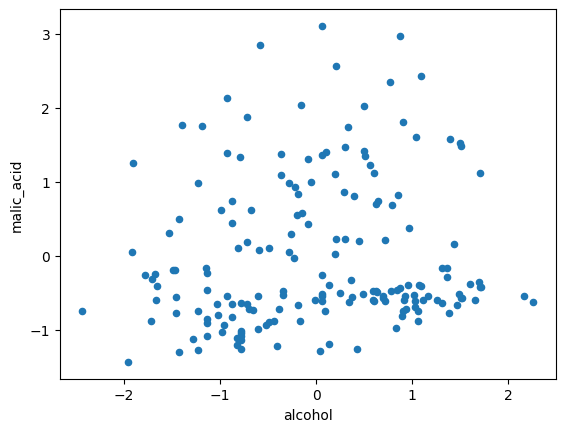

In [87]:
df2 = df[["alcohol", "malic_acid"]]
colors = []
for ci in y:
    if ci == 0:
        colors.append('blue')
    elif ci == 1:
        colors.append('red')
    elif ci == 2:
        colors.append('magenta')

df.plot.scatter("alcohol", "malic_acid")
plt.show()

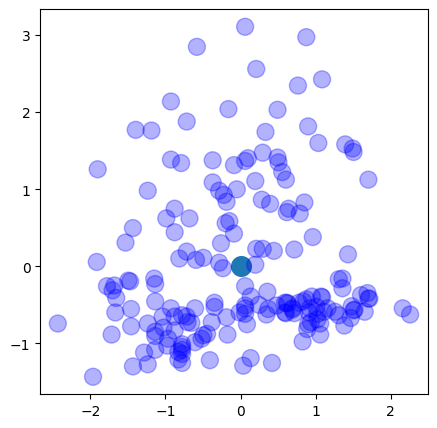

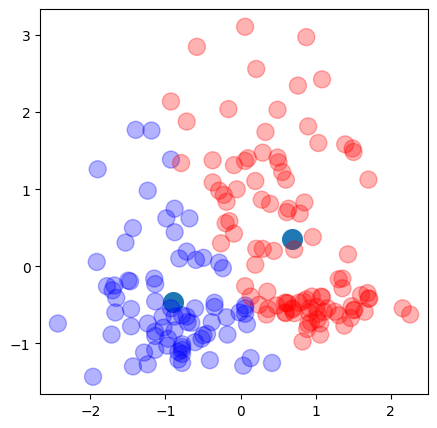

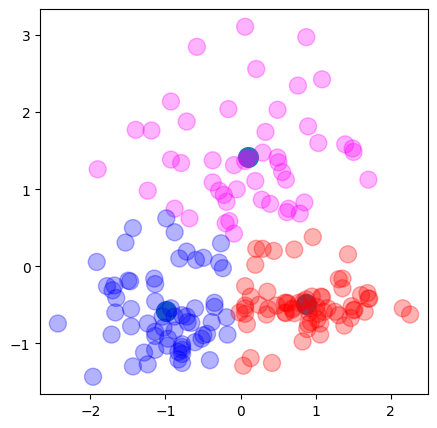

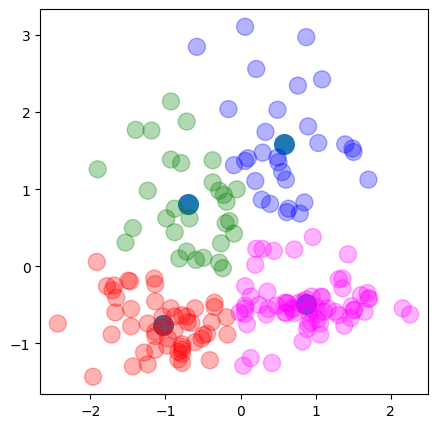

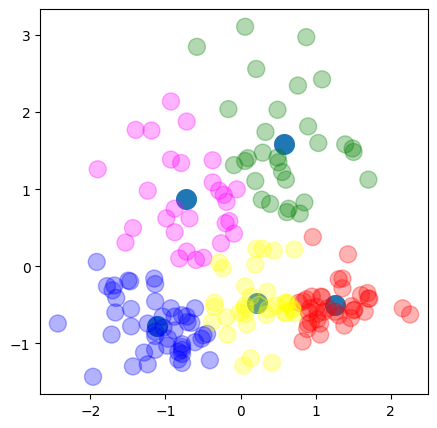

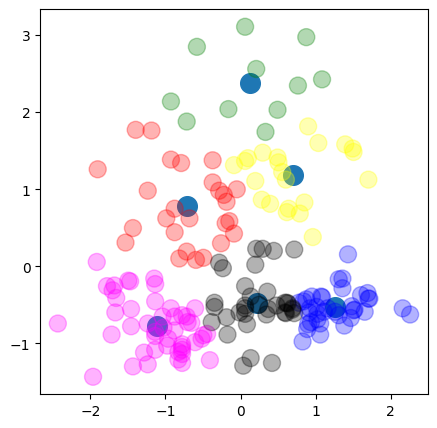

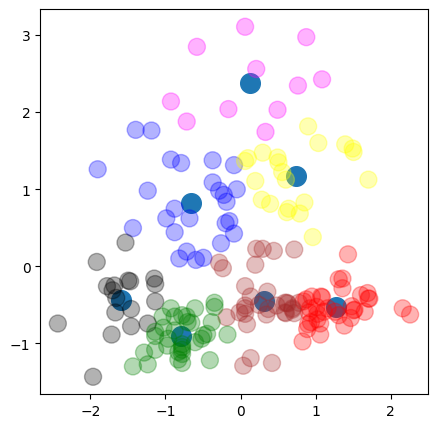

In [91]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
ssdist = []
for k in range(1,8):
    clf = KMeans(n_clusters=k)
    clf = clf.fit(df2)

    cluster_colors = []
    for ci in clf.labels_:
        if ci == 0:
            cluster_colors.append('blue')
        elif ci == 1:
            cluster_colors.append('red')
        elif ci == 2:
            cluster_colors.append('magenta')
        elif ci == 3:
            cluster_colors.append('green')
        elif ci == 4:
            cluster_colors.append('yellow')
        elif ci == 5:
            cluster_colors.append('black')
        elif ci == 6:
            cluster_colors.append('brown')
        elif ci == 7:
            cluster_colors.append('cyan')
    _ = plt.figure(figsize=(5, 5))
    plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], s=200)
    plt.scatter(df['alcohol'], df['malic_acid'], c=cluster_colors, alpha=0.3, s=150)
    # plt.scatter(df['alcohol'], df['color_intensity'], c=colors, s=10, alpha=0.8)
    plt.show()

    distortions.append(sum(np.min(cdist(df2, clf.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    ssdist.append(clf.inertia_)

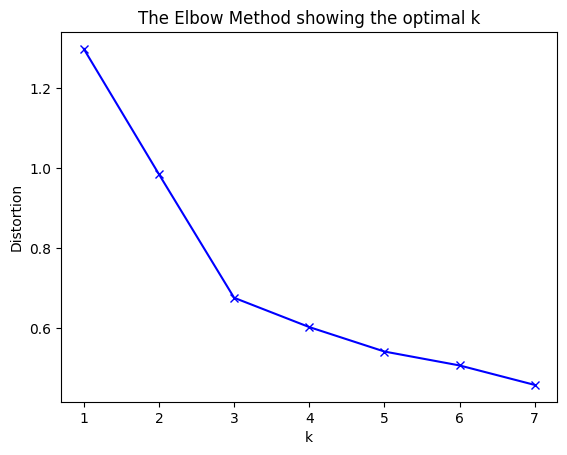

In [89]:
plt.plot(range(1, 8), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

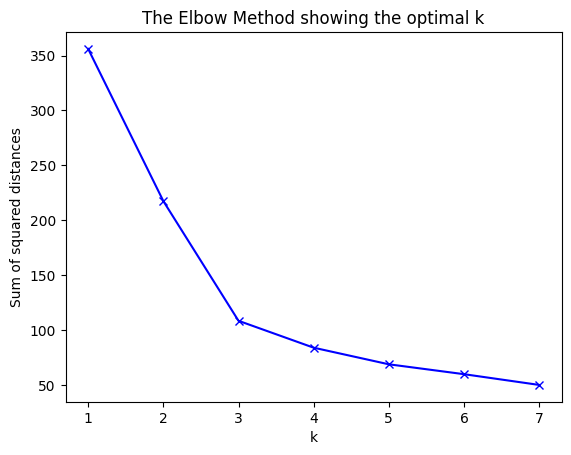

In [90]:
plt.plot(range(1, 8), ssdist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()